# Welcome

Welcome to this first workbook. Here we will set up the environment to make sure the following workbooks will work correctly. 

The plan for this workbook is to:
- Set up the dtk_setup.cfg file
- Make sure the dtk import statement are working
- Make sure a simulation can run
- Prove that we can graph something

# Setup the dtk_setup.cfg file

This file contains all the paths and information needed by the DTK python package to execute your simulations locally or on COMPS. For the purpose of this demo, only the local simulations will be used.

This file is located at `C:\Python27\Lib\site-packages\dtk\dtk_setup.cfg`. You can edit it by hand, but we made things convenient and you can set the different paths directly in the following block. Make sure to execute it before continuing.


In [1]:
import os
import utils

###
# How many simulations will be executed
# 10 is a good default value that will accommodate all the examples
# and prevent you to run too many simulations with a misconfigured sweep
max_sims = 10

###
# The simulations storage path
# We default it to a /simulations folder contained at the same level as the workbooks
current_path = os.path.dirname(os.path.abspath('__file__'))
sim_root = os.path.join(current_path, 'simulations')

###
# The input files path
# Necessary input files are provided with this package and are located in a Data_Files folder
input_root = os.path.join(current_path, 'Data_Files')

###
# Binary path
# Default to a bin/ folder
bin_path = os.path.join(current_path, 'bin')

###
# Eradication.exe path
# If you have installed the EMOD 2.0 quickstart bundle, the Eradication.exe should be at the default location.
exe_path = os.path.join(os.getenv('USERPROFILE'),"appdata\\local\\EMOD\\QuickStart\\v2.0.0\\Eradication.exe")

# Write the values to the config
utils.write_dtk_config(max_sims, sim_root, input_root, bin_path, exe_path)

C:\Python27\lib\site-packages\dtk\dtk_setup.cfg
The dtk_config.cfg file has been successfully updated!


# Make sure the dtk import works
The dtk package contains all the scripts necessary to run simulations. We need to make sure that your environment is properly configured and that you can properly import it.

In [2]:
import dtk
utils.test_if_dtk_present()

Failed loading COMPSJavaInterop package; you will only be able to run local simulations
The DTK module is present and working!


# Make sure we can run simulations
Let's run a test simulation and check if we can poll for its status.

<div class="alert alert-danger" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>Make sure to wait for the *The simulation completed successfully!* message before moving to the next step.</p>
</div>


In [3]:
from dtk.utils.core.DTKConfigBuilder import DTKConfigBuilder
from dtk.vector.study_sites import configure_site
from dtk.utils.core.DTKSetupParser import DTKSetupParser
from dtk.utils.simulation.SimulationManager import SimulationManagerFactory
import time

# Create the config builder and load the defaults
cb = DTKConfigBuilder.from_defaults('VECTOR_SIM')

# Lets run our simulation with the Namawala input set
configure_site(cb, 'Namawala')

# We are setting some other boilerplate parameters
run_sim_args =  { 'config_builder' : cb,
                  'exp_name'       : 'ExampleSim' }

# Launch the simulation locally
sm = SimulationManagerFactory.from_exe(DTKSetupParser().get('BINARIES','exe_path'),'LOCAL')
sm.RunSimulations(**run_sim_args)

# We will monitor the simulation every 3 seconds until finished
while True:
    print "Simulation running..."
    states, msgs = sm.SimulationStatus()
    if sm.statusFinished(states): break
    else: time.sleep(3)

# Test if the simulation completed successfully
utils.test_if_simulation_done(states)

Simulation running...
Simulation running...
The simulation completed successfully!


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Python27\lib\threading.py", line 810, in __bootstrap_inner
    self.run()
  File "C:\Python27\lib\site-packages\dtk\utils\simulation\Monitor.py", line 30, in run
    if self.job_id in jobids and ('Eradication.exe' in psutil.Process(self.job_id).exe()):
TypeError: 'str' object is not callable



# Retrieve the outputs and graph them
Now that our test simulation completed successfully, lets visualize a graph of the output to make sure we can graph something.

(0, '2015_08_05_18_04_06_048000')


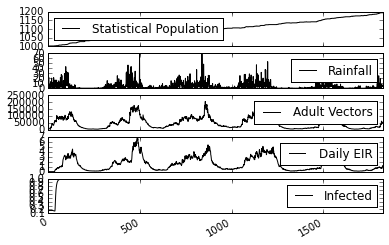

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
# Add an analyzer to the simulation manager
sm.AddAnalyzer( utils.NotebookAnalyzer())

# Launch the analysis
sm.AnalyzeSimulations()